In [87]:
import pandas
import matplotlib.pyplot as plt
from numpy import polyfit, linspace

# read the data for Anscombe's Quartet into a dataframe
df = pandas.read_csv("df.csv")

# [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

The Quartet consists of four sets, each containing eleven points.  Most of the statistical tests you would use to compare datasets are either identical, or almost identical (matching to at least a few decimal places).

## mean (average)

* for each set, the mean (average) of `x` are identical (`9.000`)
* and mean of `y` are almost identical (`7.500`)

In [2]:
df[['x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3', 'y4']].mean()

x1    9.000000
x2    9.000000
x3    9.000000
x4    9.000000
y1    7.500909
y2    7.500909
y3    7.500000
y4    7.500909
dtype: float64

## Variance

Variance measures how far each set of values is from their mean.

* for each set, variance of x from the mean is the same (`11.0`)
* for each set, variance of y from the mean is almost the same (`4.12`)

In [3]:
df[['x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3', 'y4']].var()

x1    11.000000
x2    11.000000
x3    11.000000
x4    11.000000
y1     4.127269
y2     4.127629
y3     4.122620
y4     4.123249
dtype: float64

## Correlation

Correlation measures how related each `x` value is to the corresponding `y`.

* for each set in the quartet, the correlation value of `x` to `y` is almost identical (`0.816`)
* perfectly correlated data would receive a value of `1.0`.  note that `x` is perfectly correlated with itself, as is `y`...

In [6]:
df[['x1', 'y1']].corr()

x1        y1
x1  1.000000  0.816421
y1  0.816421  1.000000

In [7]:
df[['x2', 'y2']].corr()

x2        y2
x2  1.000000  0.816237
y2  0.816237  1.000000

In [8]:
df[['x3', 'y3']].corr()

x3        y3
x3  1.000000  0.816287
y3  0.816287  1.000000

In [9]:
df[['x4', 'y4']].corr()

x4        y4
x4  1.000000  0.816521
y4  0.816521  1.000000

## Linear Regression

Linear regression is a technique for analyzing `(x,y)` datapoints to find the "best fit" line for all the points.

For each set in the quartet, the linear regression values are almost identical
* slope (`0.5`)
* intercept (`3.0`)

If we plot those lines, they do look a _lot_ alike...

In [88]:
(s1, i1) = polyfit(df['x1'], df['y1'], 1)
print((s1,i1))
points = linspace(0, 20, 10)
plt.axis([0, 20, 0, 15])
plt.plot(points, s1*points + i1)

(0.5000909090909095, 3.000090909090909)


(0.5000000000000004, 3.0009090909090896)


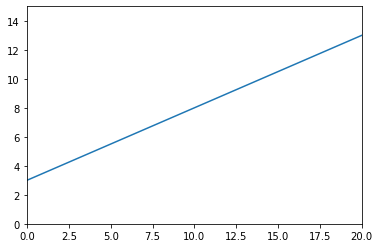

In [80]:
(s2, i2) = polyfit(df['x2'], df['y2'], 1)
print((s2,i2))
plt.axis([0, 20, 0, 15])
plt.plot(points, s2*points + i2)

(0.4997272727272731, 3.0024545454545453)


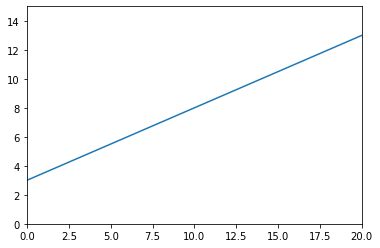

In [81]:
(s3, i3) = polyfit(df['x3'], df['y3'], 1)
print((s3,i3))
plt.axis([0, 20, 0, 15])
plt.plot(points, s3*points + i3)

(0.4999090909090908, 3.0017272727272735)


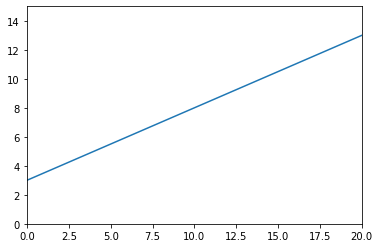

In [82]:
(s4, i4) = polyfit(df['x4'], df['y4'], 1)
print((s4,i4))
plt.axis([0, 20, 0, 15])
plt.plot(points, s4*points + i4)

## Now for the actual data

Given all of the above, you could understandably expect the datasets to look a lot alike.  But that turns out to not be the case.  When we look at the actual data behind all of these statistical snapshots, they look nothing alike:

In [89]:
df.plot.scatter(x='x1', y='y1', s=100)
plt.axis([0, 20, 0, 15])
plt.plot(points, s1*points + i1)

In [84]:
df.plot.scatter(x='x2', y='y2', s=100)
plt.axis([0, 20, 0, 15])
plt.plot(points, s2*points + i2)

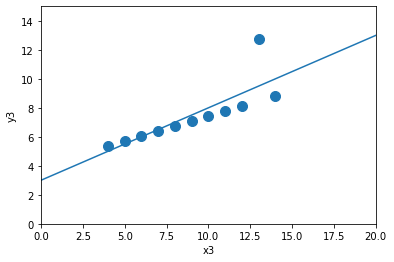

In [85]:
df.plot.scatter(x='x3', y='y3', s=100)
plt.axis([0, 20, 0, 15])
plt.plot(points, s3*points + i3)

In [86]:
df.plot.scatter(x='x4', y='y4', s=100)
plt.axis([0, 20, 0, 15])
plt.plot(points, s4*points + i4)

So, what have we learned?  What lesson is the Quartet trying to teach?

In [90]:
df

x1     y1    x2    y2    x3     y3    x4     y4
0   10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1    8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2   13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3    9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4   11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5   14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6    6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7    4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8   12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9    7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10   5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89